# Sini Sirén, TRKM23A3, Tietojenkäsittely pythonilla

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

%matplotlib inline

#plt.style.use('seaborn-whitegrid')
#plt.style.use("seaborn-v0_8-whitegrid")
#plt.style.use("seaborn-v0_8")
plt.style.use("seaborn-v0_8-whitegrid")

In [140]:
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

#### Datasetin alkutarkastus

In [141]:
# datan alkutarkistus
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  82 non-null     int64  
 1   gender                  82 non-null     int64  
 2   age                     82 non-null     int64  
 3   family                  82 non-null     int64  
 4   education               81 non-null     float64
 5   years_of_service        80 non-null     float64
 6   salary                  82 non-null     int64  
 7   sat_management          82 non-null     int64  
 8   sat_colleques           81 non-null     float64
 9   sat_workingEnvironment  82 non-null     int64  
 10  sat_salary              82 non-null     int64  
 11  sat_tasks               82 non-null     int64  
 12  healtcare               47 non-null     float64
 13  holidayCabin            20 non-null     float64
 14  gym                     9 non-null      floa

In [142]:
df.describe()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
count,82.000000,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000,47.0,20.0,9.0,22.0
mean,41.500000,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122,1.0,1.0,1.0,1.0
std,23.815261,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502,0.0,0.0,0.0,0.0
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,21.250000,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000,1.0,1.0,1.0,1.0
50%,41.500000,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.0,1.0,1.0,1.0
75%,61.750000,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000,1.0,1.0,1.0,1.0
max,82.000000,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,1.0,1.0


In [143]:
df.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [144]:
df.tail()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN
81,82,2,35,2,3.0,15.0,2183,3,4.0,4,3,4,1.0,NaN,NaN,NaN


In [145]:

# datan siivous, pudotetaan pois eka ja 4 vikaa saraketta
df=df.drop(columns= ['number', 'healtcare', 'holidayCabin', 'gym', 'muscleCare'])
df.head()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


In [146]:
# tarkistetaan datasetti uudestaan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  82 non-null     int64  
 1   age                     82 non-null     int64  
 2   family                  82 non-null     int64  
 3   education               81 non-null     float64
 4   years_of_service        80 non-null     float64
 5   salary                  82 non-null     int64  
 6   sat_management          82 non-null     int64  
 7   sat_colleques           81 non-null     float64
 8   sat_workingEnvironment  82 non-null     int64  
 9   sat_salary              82 non-null     int64  
 10  sat_tasks               82 non-null     int64  
dtypes: float64(3), int64(8)
memory usage: 7.2 KB


In [147]:
df.isnull().sum()


gender                    0
age                       0
family                    0
education                 1
years_of_service          2
salary                    0
sat_management            0
sat_colleques             1
sat_workingEnvironment    0
sat_salary                0
sat_tasks                 0
dtype: int64

In [148]:
df.count()

gender                    82
age                       82
family                    82
education                 81
years_of_service          80
salary                    82
sat_management            82
sat_colleques             81
sat_workingEnvironment    82
sat_salary                82
sat_tasks                 82
dtype: int64

In [149]:
for var in df:
    print(var, df[var].unique())

gender [1 2]
age [38 29 30 36 24 31 49 55 40 33 39 35 58 53 42 26 47 44 43 56 21 45 59 37
 28 50 32 51 22 34 27 41 25 61 20 52 46]
family [1 2]
education [ 1.  2.  3.  4. nan]
years_of_service [22. 10.  7. 14.  4. 16.  0. 23. 21. 15. 12.  2. 17. 20. 13. 27.  1.  3.
 nan 24.  5.  9.  6. 35. 28. 18. 36. 19.  8.]
salary [3587 2963 1989 2144 2183 1910 2066 2768 2106 2651 2846 2808 3393 2691
 5225 2729 2925 2457 4874 3510 4446 1521 2223 1949 2340 6278 1559 2027
 2300 2534 1872 2261 2417 3119 2574 1715 5069 2495 3470 1598 1638 2612]
sat_management [3 1 2 4 5]
sat_colleques [ 3.  5.  4.  2. nan]
sat_workingEnvironment [3 2 1 5 4]
sat_salary [3 1 2 4 5]
sat_tasks [3 2 4 1 5]


#### Perhemuuttuja / Family



In [150]:
# Family / perhemuuttuja - luokkamuuttuja
# single = 1
# not single = 2
# 82 vastausta

df.nlargest(n = 3, columns = 'family')
# en ymmärrä mitä iloa tästä on, mutta siis top kolme "ei sinkkua"

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
5,2,31,2,2.0,14.0,1910,4,4.0,5,2,4


In [151]:
df.nsmallest(n = 3, columns = 'family')
# samoin tämä, kolme "alinta" sinkkua

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


In [152]:
df_family=pd.crosstab(df['family'], 'Count')

In [153]:
df_family
# sinkkumittarin jakautuminen
# single = 1
# not single = 2

col_0,Count
family,
1,31
2,51


In [154]:
df_family.index=['perheetön', 'perheellinen']
df_family.columns.name=''
df_family

,Count
perheetön,31
perheellinen,51


<Axes: >

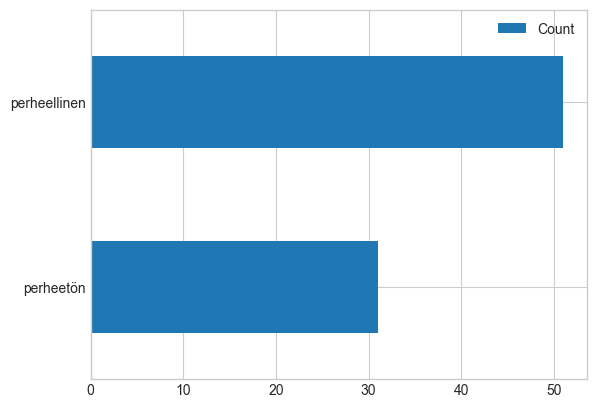

In [155]:
# TÄTÄ EI ILMEISESTI SAANUT KÄYTTÄÄ MUTTA KOKEILLAAN NYT KUITENKIN
df_family.plot.barh()

##### Perhetilanne taulukko

Text(0.5, 0, 'vastaajia, N=82')

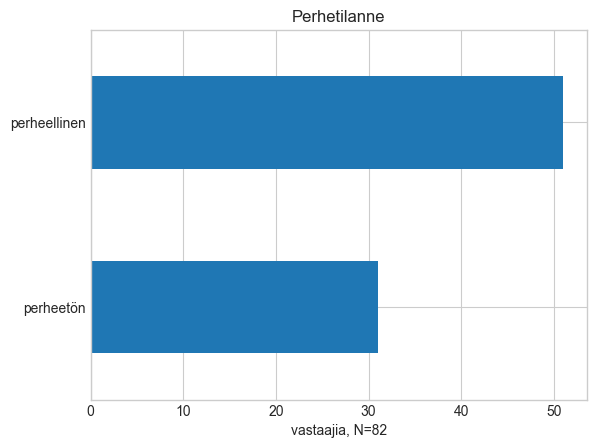

In [156]:
# TÄTÄ EI ILMEISESTI SAANUT KÄYTTÄÄ MUTTA KOKEILLAAN NYT KUITENKIN
df_family.plot.barh(legend = False)

plt.title('Perhetilanne')
plt.xlabel('vastaajia, N=82')

In [157]:
# perhestatus prosentteina

df_family_prosentti = pd.crosstab(df['family'], 'määrä')
df_family_prosentti['%'] = df_family_prosentti['määrä'] / df_family_prosentti['määrä'].sum() * 100
df_family_prosentti.index = ['perheetön', 'perheellinen']
df_family_prosentti.columns.name = ''
df_family_prosentti

,määrä,%
perheetön,31,37.804878
perheellinen,51,62.195122


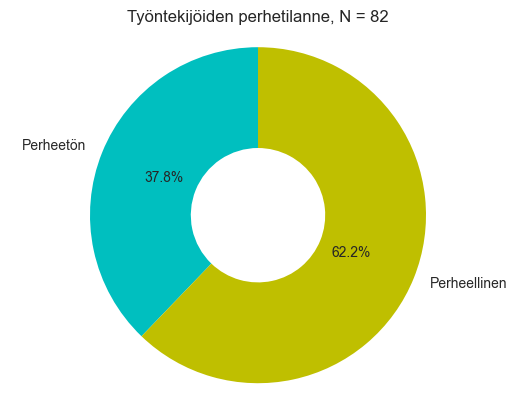

In [158]:
labels = ['Perheetön', 'Perheellinen']
values = df_family_prosentti['%']
colors = ['c', 'y']
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6), colors=colors)
plt.axis('equal')
plt.title('Työntekijöiden perhetilanne, N = 82')
plt.show()

### Perhetilanteen vertailu sat-muuttujiin

#### Perhe + johto

In [159]:
# TYYTYVÄISYYS JOHTOON / sat_management
df_perhe_johto = pd.crosstab(df['family'], df['sat_management']) 
df_perhe_johto.index = ['perheetön', 'perheellinen']
df_perhe_johto

sat_management,1,2,3,4,5
perheetön,4,7,13,6,1
perheellinen,3,9,17,17,5


In [160]:
from scipy.stats import chi2_contingency
chi2_contingency(df_perhe_johto)

# pvalue=np.float64(0.3761371786488699)

Chi2ContingencyResult(statistic=np.float64(4.227143957162107), pvalue=np.float64(0.3761371786488699), dof=4, expected_freq=array([[ 2.64634146,  6.04878049, 11.34146341,  8.69512195,  2.26829268],
       [ 4.35365854,  9.95121951, 18.65853659, 14.30487805,  3.73170732]]))

In [161]:

# ovatko perheelliset tyytyväisempiä johtoon / johtamiseen kuin ei-perheelliset?


# subset

df_perhe_johto = pd.crosstab(df['sat_management'], df['family'])
df_perhe_johto.index= ['tyytymätön', 'ei hyvä', 'en osaa sanoa / ok', 'ihan jees', 'tosi hyvä' ]
df_perhe_johto.columns = ['perheetön', 'perheellinen']
df_perhe_johto.columns.name='Tyytyväisyys johtoon'
df_perhe_johto.loc['Vastaajien määrä yht.'] = df_perhe_johto.sum()

df_perhe_johto



Tyytyväisyys johtoon,perheetön,perheellinen
tyytymätön,4,3
ei hyvä,7,9
en osaa sanoa / ok,13,17
ihan jees,6,17
tosi hyvä,1,5
Vastaajien määrä yht.,31,51


In [162]:
# taulukko prosentteina

df_perhe_johto = pd.crosstab(df['sat_management'], df['family'], normalize = 'columns') * 100
df_perhe_johto.index= ['Tyytymätön', 'Jokseenkin tyytymätön', 'En osaa sanoa', 'Jokseenkin tyytyväinen', 'Tyytyväinen' ]
df_perhe_johto.columns = ['perheetön', 'perheellinen']
df_perhe_johto.columns.name='Tyytyväisyys johtoon prosenttijakauma'
df_perhe_johto.loc['Yhteensä %'] = df_perhe_johto.sum()
df_perhe_johto = df_perhe_johto.round(1)
df_perhe_johto.loc['Vastaajien määrä yht. 82 kpl'] = '31 kpl', '51 kpl'
df_perhe_johto

Tyytyväisyys johtoon prosenttijakauma,perheetön,perheellinen
Tyytymätön,12.9,5.9
Jokseenkin tyytymätön,22.6,17.6
En osaa sanoa,41.9,33.3
Jokseenkin tyytyväinen,19.4,33.3
Tyytyväinen,3.2,9.8
Yhteensä %,100.0,100.0
Vastaajien määrä yht. 82 kpl,31 kpl,51 kpl


#### Kollegamuuttujan alkusiivous

In [163]:
# TYYTYVÄISYYS KOLLEGOIHIN / sat_colleques
# arvot:
# sat_colleques [ 3.  5.  4.  2. nan]
# ei yhtään ykköstä
df.isnull().sum()
# yksi puuttuva arvo


gender                    0
age                       0
family                    0
education                 1
years_of_service          2
salary                    0
sat_management            0
sat_colleques             1
sat_workingEnvironment    0
sat_salary                0
sat_tasks                 0
dtype: int64

In [164]:
nan_or_zero_rows = df[df['sat_colleques'].isna() | (df['sat_colleques'] == 0)]
print(nan_or_zero_rows)
# rivi 56

    gender  age  family  education  years_of_service  salary  sat_management  \
56       1   61       2        2.0              36.0    3119               2   

    sat_colleques  sat_workingEnvironment  sat_salary  sat_tasks  
56            NaN                       2           1          5  


In [165]:
# lasketaan tyytyväisyys kollegoihin keskiarvo 
kollegat_ka = df['sat_colleques'].mean()
print(kollegat_ka)
# ka 4.0617...

4.061728395061729


In [166]:
# mediaani
kollegat_mediaani = df['sat_colleques'].median()
print(kollegat_mediaani)
# 4

4.0


In [167]:
df['sat_colleques'].fillna(kollegat_mediaani,inplace=True)

C:\Users\SiniS\AppData\Local\Temp\ipykernel_19876\896083815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sat_colleques'].fillna(kollegat_mediaani,inplace=True)


In [168]:
specific_row = df.loc[56]
print(specific_row)

gender                       1.0
age                         61.0
family                       2.0
education                    2.0
years_of_service            36.0
salary                    3119.0
sat_management               2.0
sat_colleques                4.0
sat_workingEnvironment       2.0
sat_salary                   1.0
sat_tasks                    5.0
Name: 56, dtype: float64


In [169]:
sat_vastausvaihtoehdot = [1, 2, 3, 4, 5]

# jos arvoja ei ole niin 0
vastaus_laskuri = df['sat_colleques'].value_counts().reindex(sat_vastausvaihtoehdot, fill_value=0)

# datasetti arvosanoille ja vastauksille
kollega_vastaukset = pd.DataFrame({'Arvosana': vastaus_laskuri.index, 'Vastaukset': vastaus_laskuri.values})

# vastaus sarakkeeseen kootaan vastausten määrä per rivi
vastaukset_yht = kollega_vastaukset['Vastaukset'].sum()


vastaukset_rivi = pd.DataFrame({'Arvosana': ['Yhteensä'], 'Vastaukset': [vastaukset_yht]})

kollega_vastaukset = pd.concat([kollega_vastaukset, vastaukset_rivi], ignore_index=True)

print("Tyytyväisyys kollegoihin")
print(kollega_vastaukset.to_string(index=False))

Tyytyväisyys kollegoihin
Arvosana  Vastaukset
       1           0
       2           3
       3          16
       4          36
       5          27
Yhteensä          82


#### Perhe + kollegat

In [170]:
# PERHE + KOLLEGAT

df_perhe_kollegat = pd.crosstab(df['sat_colleques'], df['family'])
#df_perhe_kollegat.index = ['ei hyvä', 'en osaa sanoa / ok', 'ihan jees', 'tosi hyvä' ]
df_perhe_kollegat.columns = ['perheetön', 'perheellinen']
#df['sat_workingEnvironment'],df['sat_salary'],df['sat_tasks'],

In [171]:
from scipy.stats import chi2_contingency
chi2_contingency(df_perhe_kollegat)

# pvalue=np.float64(0.7265096726662) --> ei riippuvuutta

Chi2ContingencyResult(statistic=np.float64(1.311054887904983), pvalue=np.float64(0.7265096726662), dof=3, expected_freq=array([[ 1.13414634,  1.86585366],
       [ 6.04878049,  9.95121951],
       [13.6097561 , 22.3902439 ],
       [10.20731707, 16.79268293]]))

#### Perhe + työympäristö

In [172]:
# PERHE + TYÖYMPÄRISTÖ

df_perhe_ymparisto = pd.crosstab(df['sat_workingEnvironment'], df['family'])
#df_perhe_kollegat.index = ['ei hyvä', 'en osaa sanoa / ok', 'ihan jees', 'tosi hyvä' ]
df_perhe_ymparisto.columns = ['perheetön', 'perheellinen']
#,df['sat_salary'],df['sat_tasks'],


chi2_contingency(df_perhe_ymparisto)

# pvalue=np.float64(0.07571884501720708) --> ei riippuvuutta

Chi2ContingencyResult(statistic=np.float64(8.47270716126421), pvalue=np.float64(0.07571884501720708), dof=4, expected_freq=array([[ 3.40243902,  5.59756098],
       [ 3.40243902,  5.59756098],
       [11.34146341, 18.65853659],
       [ 8.69512195, 14.30487805],
       [ 4.15853659,  6.84146341]]))

#### Perhe + palkka

In [173]:
# PERHE + PALKKA

df_perhe_palkka = pd.crosstab(df['sat_salary'], df['family'])
#df_perhe_kollegat.index = ['ei hyvä', 'en osaa sanoa / ok', 'ihan jees', 'tosi hyvä' ]
df_perhe_palkka.columns = ['perheetön', 'perheellinen']
#,df['sat_tasks'],
chi2_contingency(df_perhe_palkka)

# pvalue=np.float64(0.2993065167615922) --> ei riippuvuutta


Chi2ContingencyResult(statistic=np.float64(4.88495783763935), pvalue=np.float64(0.2993065167615922), dof=4, expected_freq=array([[12.47560976, 20.52439024],
       [ 7.18292683, 11.81707317],
       [ 7.18292683, 11.81707317],
       [ 3.7804878 ,  6.2195122 ],
       [ 0.37804878,  0.62195122]]))

#### Perhe + tehtävät --> esitykseen

In [174]:
# PERHE + TEHTÄVÄT

df_perhe_tyoteht = pd.crosstab(df['sat_tasks'], df['family'])
df_perhe_tyoteht.index = ['Tyytymätön', 'Jokseenkin tyytymätön', 'En osaa sanoa', 'Jokseenkin tyytyväinen', 'Tyytyväinen' ]
df_perhe_tyoteht.columns = ['perheetön', 'perheellinen']
df_perhe_tyoteht.columns.name='Tyytyväisyys työtehtäviin '
df_perhe_tyoteht.loc['Vastaajien määrä yht.'] = df_perhe_tyoteht.sum()
df_perhe_tyoteht

#chi2_contingency(df_perhe_tyoteht)

# pvalue=np.float64(0.0340357152085103) --> melkein merkitsevä riippuvuus?

Tyytyväisyys työtehtäviin,perheetön,perheellinen
Tyytymätön,3,2
Jokseenkin tyytymätön,9,6
En osaa sanoa,13,16
Jokseenkin tyytyväinen,4,21
Tyytyväinen,2,6
Vastaajien määrä yht.,31,51


In [175]:
perhe_tyoteht_yht_vastaukset = df_perhe_tyoteht.assign(VastauksetYht=df_perhe_tyoteht.sum(axis=1))

print(perhe_tyoteht_yht_vastaukset)

Tyytyväisyys työtehtäviin   perheetön  perheellinen  VastauksetYht
Tyytymätön                          3             2              5
Jokseenkin tyytymätön               9             6             15
En osaa sanoa                      13            16             29
Jokseenkin tyytyväinen              4            21             25
Tyytyväinen                         2             6              8
Vastaajien määrä yht.              31            51             82


In [176]:
df_perhe_tyoteht_prosentteina = pd.crosstab(df['sat_tasks'], df['family'],normalize = 'columns')*100
df_perhe_tyoteht_prosentteina.index = ['Tyytymätön', 'Jokseenkin tyytymätön', 'En osaa sanoa', 'Jokseenkin tyytyväinen', 'Tyytyväinen' ]
df_perhe_tyoteht_prosentteina.columns = ['perheetön', 'perheellinen']
df_perhe_tyoteht_prosentteina.columns.name='Tyytyväisyys työtehtäviin prosenttijakauma '


df_perhe_tyoteht_prosentteina.loc['Yhteensä %'] = df_perhe_tyoteht_prosentteina.sum()

df_perhe_tyoteht_prosentteina['perheetön'] = df_perhe_tyoteht_prosentteina['perheetön'].apply(lambda x: '{:.1f}'.format(x).rstrip('0').rstrip('.'))
df_perhe_tyoteht_prosentteina['perheellinen'] = df_perhe_tyoteht_prosentteina['perheellinen'].apply(lambda x: '{:.1f}'.format(x).rstrip('0').rstrip('.'))
df_perhe_tyoteht_prosentteina.loc['Vastaukset kyselyyn yht. 82 kpl']= ('31 kpl', '51 kpl')
df_perhe_tyoteht_prosentteina

# Näyttäisi siltä, että perheelliset ovat tyytyväisempiä työtehtäviinsä kuin perheettömät, 
# erityisesti vastauksia arvolla 4 on huomattavasti enemmän perheellisten vastauksissa kuin perheettömien osalta

Tyytyväisyys työtehtäviin prosenttijakauma,perheetön,perheellinen
Tyytymätön,9.7,3.9
Jokseenkin tyytymätön,29,11.8
En osaa sanoa,41.9,31.4
Jokseenkin tyytyväinen,12.9,41.2
Tyytyväinen,6.5,11.8
Yhteensä %,100,100
Vastaukset kyselyyn yht. 82 kpl,31 kpl,51 kpl


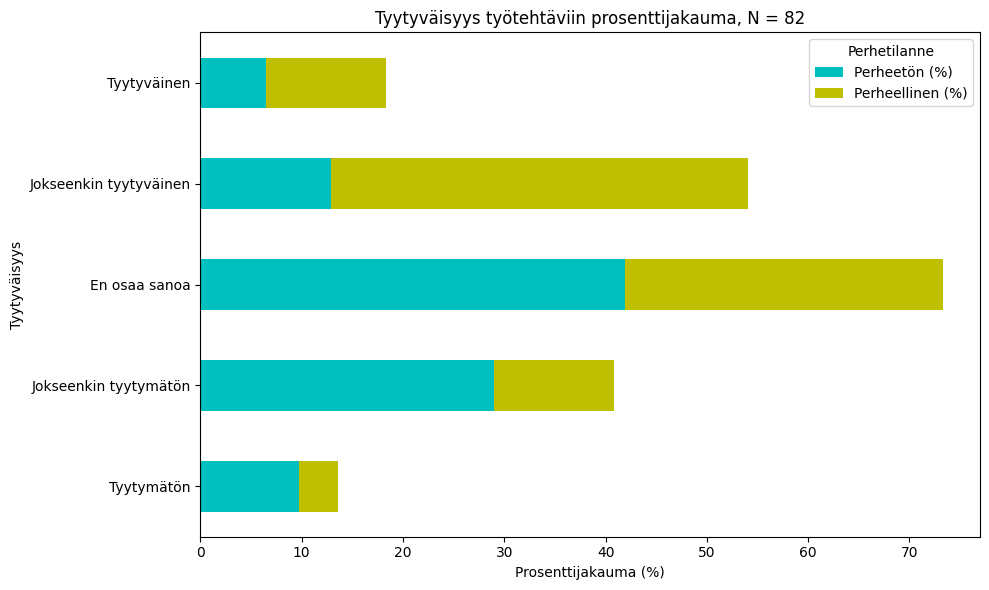

In [6]:
tyytyvaisyys_tyo_perhe = {
    "Tyytyväisyys": ["Tyytymätön", "Jokseenkin tyytymätön", "En osaa sanoa", "Jokseenkin tyytyväinen", "Tyytyväinen"],
    "Perheetön (%)": [9.7, 29 , 41.9 , 12.9 , 6.5],
    "Perheellinen (%)": [3.9, 11.8,31.4, 41.2, 11.8 ]
}

# Create a DataFrame
df = pd.DataFrame(tyytyvaisyys_tyo_perhe)

# Set 'Tyytyväisyys' as the index
df.set_index("Tyytyväisyys", inplace=True)

# Plot a horizontal stacked bar chart
df.plot.barh(stacked=True, figsize=(10, 6), color=['c', 'y'])

# Adding labels and title
plt.title('Tyytyväisyys työtehtäviin prosenttijakauma, N = 82')
plt.xlabel('Prosenttijakauma (%)')
plt.ylabel('Tyytyväisyys')
plt.legend(title='Perhetilanne')

# Show the plot
plt.tight_layout()
plt.show()

#### Työskentelyvuodet / years_of_service

In [51]:
# years_of_service / työskentelyvuodet - numeerinen muuttuja, joka muutettava luokiteltavaksi muuttujaksi
# the years of service for the company - eli siis vain täydet vuodet / jos työskennellyt alle vuoden, on arvo 0?
# 80 vastausta / 82 
# täällä on kaksi riviä, joissa ei ole lainkaan arvoa - etsi ja tarkista

In [52]:
df.nlargest(n = 3, columns = 'years_of_service')
# pisimpään työskennellyt 36 vuotta

KeyError: 'years_of_service'

In [179]:
df.nsmallest(n = 3, columns = 'years_of_service')
# lyhyimmän aikaa 0 vuotta eli alle 1 vuoden?

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
7,1,55,1,1.0,0.0,2066,3,5.0,3,1,3
35,1,31,2,3.0,0.0,1559,2,4.0,3,1,3
61,1,40,2,1.0,0.0,1872,2,3.0,1,2,3


In [180]:
# puuttuvien rivien määrä 2
df.isnull().sum()

gender                    0
age                       0
family                    0
education                 1
years_of_service          2
salary                    0
sat_management            0
sat_colleques             0
sat_workingEnvironment    0
sat_salary                0
sat_tasks                 0
dtype: int64

In [181]:
# NaN & 0 rivit palvelusvuosissa --> NaN rivit 29 ja 57
nan_or_zero_rows = df[df['years_of_service'].isna() | (df['years_of_service'] == 0)]
print(nan_or_zero_rows)

    gender  age  family  education  years_of_service  salary  sat_management  \
7        1   55       1        1.0               0.0    2066               3   
29       1   21       1        NaN               NaN    1949               4   
35       1   31       2        3.0               0.0    1559               2   
57       1   38       2        2.0               NaN    2574               2   
61       1   40       2        1.0               0.0    1872               2   
77       1   22       1        3.0               0.0    1598               4   

    sat_colleques  sat_workingEnvironment  sat_salary  sat_tasks  
7             5.0                       3           1          3  
29            4.0                       3           3          2  
35            4.0                       3           1          3  
57            3.0                       1           1          2  
61            3.0                       1           2          3  
77            4.0                    

In [182]:
nan_rows = df[df['years_of_service'].isna()]
print(nan_rows)

    gender  age  family  education  years_of_service  salary  sat_management  \
29       1   21       1        NaN               NaN    1949               4   
57       1   38       2        2.0               NaN    2574               2   

    sat_colleques  sat_workingEnvironment  sat_salary  sat_tasks  
29            4.0                       3           3          2  
57            3.0                       1           1          2  


In [183]:
# subsetti, josta poistettu nan rivit
df_palvelusvuodet_ilman_tyhjiä = df.dropna(subset=['years_of_service'])
df_palvelusvuodet_ilman_tyhjiä = df[df['years_of_service'].notna()]

df_palvelusvuodet_ilman_tyhjiä.isnull().sum()



gender                    0
age                       0
family                    0
education                 0
years_of_service          0
salary                    0
sat_management            0
sat_colleques             0
sat_workingEnvironment    0
sat_salary                0
sat_tasks                 0
dtype: int64

In [184]:
# lasketaan keskiarvo 
palvelusvuodet_ka = df_palvelusvuodet_ilman_tyhjiä['years_of_service'].mean()
print(palvelusvuodet_ka)

12.175


In [185]:
# pyöristetään keskiarvo lähimpään täyteen lukuun, koska työskentelyvuodet ovat täysiä lukuja

palvelusvuodet_ka_pyoristetty = round(palvelusvuodet_ka)
print(palvelusvuodet_ka_pyoristetty)

12


In [186]:
# mediaani
palvelusvuodet_mediaani = df_palvelusvuodet_ilman_tyhjiä['years_of_service'].median()
print(palvelusvuodet_mediaani)

12.5


In [187]:
# täytetään tyhjien rivien nan arvot keskiarvolla

df['years_of_service'].fillna(palvelusvuodet_ka_pyoristetty,inplace=True)

C:\Users\SiniS\AppData\Local\Temp\ipykernel_19876\465653198.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['years_of_service'].fillna(palvelusvuodet_ka_pyoristetty,inplace=True)


In [188]:
df.isnull().sum()

gender                    0
age                       0
family                    0
education                 1
years_of_service          0
salary                    0
sat_management            0
sat_colleques             0
sat_workingEnvironment    0
sat_salary                0
sat_tasks                 0
dtype: int64

In [189]:
# tarkistetaan onko arvot taulukossa riveillä 29 & 57
specific_row = df.loc[29]
print(specific_row)

gender                       1.0
age                         21.0
family                       1.0
education                    NaN
years_of_service            12.0
salary                    1949.0
sat_management               4.0
sat_colleques                4.0
sat_workingEnvironment       3.0
sat_salary                   3.0
sat_tasks                    2.0
Name: 29, dtype: float64


In [190]:
specific_row = df.loc[57]
print(specific_row)

gender                       1.0
age                         38.0
family                       2.0
education                    2.0
years_of_service            12.0
salary                    2574.0
sat_management               2.0
sat_colleques                3.0
sat_workingEnvironment       1.0
sat_salary                   1.0
sat_tasks                    2.0
Name: 57, dtype: float64


##### Palvelusvuosien keskijakauma

Text(0.5, 0, 'Palvelusvuodet, n=82')

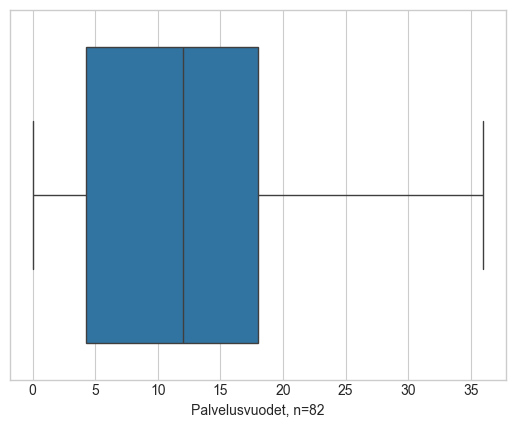

In [191]:
# PALVELUSVUOSIEN KESKIJAKAUMA
ax3 = sns.boxplot(x = df['years_of_service'])

ax3.set_xlabel('Palvelusvuodet, n=' + str(df['years_of_service'].count()))

In [192]:
# jakaminen laatikoihin
# min 0, max 36
# 0-5, 5-15, 15-25, 25-(37)

bins = [0, 5, 15, 25, 37]
df['palvelusvuosiluokka'] = pd.cut(df['years_of_service'], bins = bins,right=False)

In [193]:
df

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,palvelusvuosiluokka
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,"[15, 25)"
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,"[5, 15)"
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,"[5, 15)"
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,"[5, 15)"
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,"[0, 5)"
...,...,...,...,...,...,...,...,...,...,...,...,...
77,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,"[0, 5)"
78,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,"[0, 5)"
79,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,"[5, 15)"
80,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,"[15, 25)"


In [194]:
df_palvelusvuodet = pd.crosstab(df['palvelusvuosiluokka'], 'Yht')

df_palvelusvuodet.columns.name = ''





In [195]:
df_palvelusvuodet

,Yht
palvelusvuosiluokka,
"[0, 5)",21
"[5, 15)",25
"[15, 25)",32
"[25, 37)",4


Text(0.5, 0, 'vastaajia, N=80')

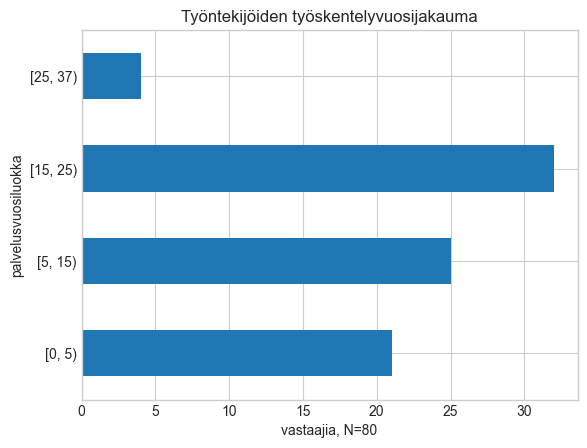

In [196]:
df_palvelusvuodet.plot.barh(legend = False)

plt.title('Työntekijöiden työskentelyvuosijakauma')
plt.xlabel('vastaajia, N=80')

In [197]:
# Prosenteiksi
n = df_palvelusvuodet['Yht'].sum()
df_palvelusvuodet['%'] = df_palvelusvuodet / n * 100

In [198]:
df_palvelusvuodet

,Yht,%
palvelusvuosiluokka,,
"[0, 5)",21,25.609756
"[5, 15)",25,30.487805
"[15, 25)",32,39.024390
"[25, 37)",4,4.878049


In [199]:
type(df_palvelusvuodet.index.values[0])


pandas._libs.interval.Interval

In [200]:
df_palvelusvuodet.index = df_palvelusvuodet.index.astype(str)
df_palvelusvuodet.loc['Yhteensä'] = df_palvelusvuodet.sum()


In [201]:
df_palvelusvuodet

,Yht,%
palvelusvuosiluokka,,
"[0, 5)",21.0,25.609756
"[5, 15)",25.0,30.487805
"[15, 25)",32.0,39.024390
"[25, 37)",4.0,4.878049
Yhteensä,82.0,100.000000


In [202]:
type(df_palvelusvuodet.index.values[0])

str

In [203]:
# SIIVOTTU TAULUKKO ESITYKSEEN!

df_palvelusvuodet.style.format({'Yht': '{:.0f}', '%': '{:.1f} %'})

,Yht,%
palvelusvuosiluokka,,
"[0, 5)",21,25.6 %
"[5, 15)",25,30.5 %
"[15, 25)",32,39.0 %
"[25, 37)",4,4.9 %
Yhteensä,82,100.0 %


##### Palvelusvuodet jaoteltuna piirakkamuodossa

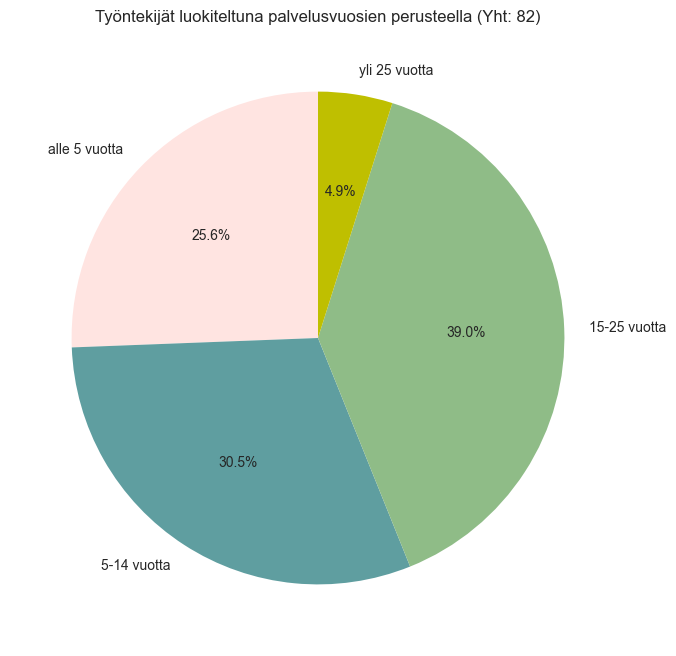

In [204]:
data = {
    'palvelusvuosiluokka': ['alle 5 vuotta', '5-14 vuotta', '15-25 vuotta', 'yli 25 vuotta'],
    'Yht': [21, 25, 32, 4],
    '%': [25.6, 30.5, 39.0, 4.9]
}

df_palveluspiirakka = pd.DataFrame(data)
total = df_palveluspiirakka['Yht'].sum()
colors = ['#FFE4E1','#5F9EA0', '#8FBC87', 'y',]

plt.figure(figsize=(8, 8))
plt.pie(df_palveluspiirakka['Yht'], labels=df_palveluspiirakka['palvelusvuosiluokka'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f'Työntekijät luokiteltuna palvelusvuosien perusteella (Yht: {total})')
plt.show()

#### Palvelusvuosien vertailu sat-muuttujiin

#### Vuodet + johto

In [205]:
# TYYTYVÄISYYS JOHTOON / sat_management
# ovatko talossa pidempään työskennelleet tyytyväisempiä johtoon?


# subset

df_vuodet_johto = pd.crosstab(df['sat_management'], df['palvelusvuosiluokka'])
df_vuodet_johto.index= ['tyytymätön', 'ei hyvä', 'en osaa sanoa / ok', 'ihan jees', 'tosi hyvä' ]
df_vuodet_johto.columns = ['alle 5 vuotta', '5-15 vuotta', '15-25 vuotta', 'yli 25 vuotta']
df_vuodet_johto.columns.name='Tyytyväisyys johtoon'
df_vuodet_johto.loc['Vastaajien määrä yht.'] = df_vuodet_johto.sum()
df_vuodet_johto_yht_vastaukset = df_vuodet_johto.assign(Yhteensä=df_vuodet_johto.sum(axis=1))

df_vuodet_johto_yht_vastaukset
#df_vuodet_johto

Tyytyväisyys johtoon,alle 5 vuotta,5-15 vuotta,15-25 vuotta,yli 25 vuotta,Yhteensä
tyytymätön,4,2,1,0,7
ei hyvä,6,3,6,1,16
en osaa sanoa / ok,3,11,15,1,30
ihan jees,5,9,7,2,23
tosi hyvä,3,0,3,0,6
Vastaajien määrä yht.,21,25,32,4,82


In [206]:
chi2_contingency(df_vuodet_johto)
# pvalue=np.float64(0.4045268344681091)

Chi2ContingencyResult(statistic=np.float64(15.666921879621412), pvalue=np.float64(0.4045268344681091), dof=15, expected_freq=array([[ 1.79268293,  2.13414634,  2.73170732,  0.34146341],
       [ 4.09756098,  4.87804878,  6.24390244,  0.7804878 ],
       [ 7.68292683,  9.14634146, 11.70731707,  1.46341463],
       [ 5.8902439 ,  7.01219512,  8.97560976,  1.12195122],
       [ 1.53658537,  1.82926829,  2.34146341,  0.29268293],
       [21.        , 25.        , 32.        ,  4.        ]]))

#### Vuodet + kollegat

In [207]:
# vuodet + KOLLEGAT

df_vuodet_kollegat = pd.crosstab(df['sat_colleques'], df['palvelusvuosiluokka'])
df_vuodet_kollegat.index = ['ei hyvä', 'en osaa sanoa / ok', 'ihan jees', 'tosi hyvä' ]
df_vuodet_kollegat.columns = ['alle 5 vuotta', '5-15 vuotta', '15-25 vuotta', 'yli 25 vuotta']

df_vuodet_kollegat.columns.name='Tyytyväisyys kollegoihin'
df_vuodet_kollegat.loc['Vastaajien määrä yht.'] = df_vuodet_kollegat.sum()
df_vuodet_kollegat_yht_vastaukset = df_vuodet_kollegat.assign(Yhteensä=df_vuodet_kollegat.sum(axis=1))


df_vuodet_kollegat_yht_vastaukset

# Näyttäisi siltä, että

Tyytyväisyys kollegoihin,alle 5 vuotta,5-15 vuotta,15-25 vuotta,yli 25 vuotta,Yhteensä
ei hyvä,1,0,2,0,3
en osaa sanoa / ok,4,6,5,1,16
ihan jees,8,15,11,2,36
tosi hyvä,8,4,14,1,27
Vastaajien määrä yht.,21,25,32,4,82


In [208]:
chi2_contingency(df_vuodet_kollegat)
#pvalue=np.float64(0.5159996397219824)

Chi2ContingencyResult(statistic=np.float64(8.18114280202822), pvalue=np.float64(0.7708192713142307), dof=12, expected_freq=array([[ 0.76829268,  0.91463415,  1.17073171,  0.14634146],
       [ 4.09756098,  4.87804878,  6.24390244,  0.7804878 ],
       [ 9.2195122 , 10.97560976, 14.04878049,  1.75609756],
       [ 6.91463415,  8.23170732, 10.53658537,  1.31707317],
       [21.        , 25.        , 32.        ,  4.        ]]))

In [209]:
## TAULUKKOVERSIO LUVUILLA

sat_vastausvaihtoehdot = [1, 2, 3, 4, 5]
df['sat_colleques'] = pd.Categorical(df['sat_colleques'], categories=sat_vastausvaihtoehdot)

# Create the crosstab, which will now include all categories (even if some have zero values)
df_vuodet_kollegat = pd.crosstab(df['sat_colleques'], df['palvelusvuosiluokka']).reindex(sat_vastausvaihtoehdot, fill_value=0)

# Relabel the index with descriptive labels
df_vuodet_kollegat.index = ['tyytymätön', 'ei hyvä', 'en osaa sanoa / ok', 'ihan jees', 'tosi hyvä']

# Rename the columns for service years
df_vuodet_kollegat.columns = ['alle 5 vuotta', '5-15 vuotta', '15-25 vuotta', 'yli 25 vuotta']

# Set the columns' name
df_vuodet_kollegat.columns.name = 'Palvelusvuosiluokka'

# Add a row with the total count for each column
df_vuodet_kollegat.loc['Vastaajien määrä yht.'] = df_vuodet_kollegat.sum()

# Add a new column with the total count across rows
df_vuodet_kollegat_yht_vastaukset = df_vuodet_kollegat.assign(Yhteensä=df_vuodet_kollegat.sum(axis=1))


df_vuodet_kollegat_yht_vastaukset


# Näyttäisi siltä, että että työkavereista pidetään, sillä kukaan ei ole vastannut, että olisi täysin tyytymätön työkavereihin. Suurin osa pitää kollegoistaan

Palvelusvuosiluokka,alle 5 vuotta,5-15 vuotta,15-25 vuotta,yli 25 vuotta,Yhteensä
tyytymätön,0,0,0,0,0
ei hyvä,1,0,2,0,3
en osaa sanoa / ok,4,6,5,1,16
ihan jees,8,15,11,2,36
tosi hyvä,8,4,14,1,27
Vastaajien määrä yht.,21,25,32,4,82


In [210]:
# First, calculate the total responses in each column (excluding the 'Vastaajien määrä yht.' row)
totals_per_column = df_vuodet_kollegat.loc['Vastaajien määrä yht.']

# Then, divide each value by the total for its column, and multiply by 100 for percentages
df_vuodet_kollegat_percent = df_vuodet_kollegat.div(totals_per_column, axis=1) * 100

# Add back the 'Vastaajien määrä yht.' row (since this row should not be turned into a percentage)
df_vuodet_kollegat_percent.loc['Vastaajien määrä yht.'] = totals_per_column

# Add a 'Yhteensä' column with the percentage of total responses per satisfaction level
df_vuodet_kollegat_percent['Yhteensä'] = df_vuodet_kollegat_percent.sum(axis=1)

df_vuodet_kollegat_percent


Palvelusvuosiluokka,alle 5 vuotta,5-15 vuotta,15-25 vuotta,yli 25 vuotta,Yhteensä
tyytymätön,0.000000,0.0,0.000,0.0,0.000000
ei hyvä,4.761905,0.0,6.250,0.0,11.011905
en osaa sanoa / ok,19.047619,24.0,15.625,25.0,83.672619
ihan jees,38.095238,60.0,34.375,50.0,182.470238
tosi hyvä,38.095238,16.0,43.750,25.0,122.845238
Vastaajien määrä yht.,21.000000,25.0,32.000,4.0,82.000000


In [211]:

# TAULUKKOVERSIO PROSENTTILUVUILLA

# Define satisfaction categories and ensure 'sat_colleques' is categorical
sat_vastausvaihtoehdot = [1, 2, 3, 4, 5]
df['sat_colleques'] = pd.Categorical(df['sat_colleques'], categories=sat_vastausvaihtoehdot)

# Create the crosstab, including all categories (even if some have zero values)
df_vuodet_kollegat = pd.crosstab(df['sat_colleques'], df['palvelusvuosiluokka']).reindex(sat_vastausvaihtoehdot, fill_value=0)

# Relabel the index with descriptive labels
df_vuodet_kollegat.index = ['Tyytymätön', 'Jokseenkin tyytymätön', 'En osaa sanoa', 'Jokseenkin tyytyväinen', 'Tyytyväinen' ]

# Rename the columns for service years
df_vuodet_kollegat.columns = ['alle 5 vuotta', '5-15 vuotta', '15-25 vuotta', 'yli 25 vuotta']

# Set the columns' name
df_vuodet_kollegat.columns.name = 'Tyytyväisyys kollegoihin prosentteina '

# Add a 'Yhteensä' column with the total count across rows
df_vuodet_kollegat['Yhteensä'] = df_vuodet_kollegat.sum(axis=1)

# Safely check if "Vastaajien määrä yht." row exists before dropping it
if 'Vastaajien määrä yht.' in df_vuodet_kollegat.index:
    df_vuodet_kollegat_cleaned = df_vuodet_kollegat.drop('Vastaajien määrä yht.')
else:
    df_vuodet_kollegat_cleaned = df_vuodet_kollegat

# Calculate the row-wise percentages (including the "Yhteensä" column)
df_vuodet_kollegat_percent = df_vuodet_kollegat_cleaned.div(df_vuodet_kollegat_cleaned['Yhteensä'], axis=0) * 100

# Replace NaN values with 0s
df_vuodet_kollegat_percent = df_vuodet_kollegat_percent.fillna(0)

# Format the DataFrame to display percentages with one decimal place
df_vuodet_kollegat_percent = df_vuodet_kollegat_percent.applymap(lambda x: f"{x:.1f}")
df_vuodet_kollegat_percent.loc['Vastaajien määrä yht. kpl'] = df_vuodet_kollegat.sum()

# Display the final DataFrame with percentages and a "Yhteensä" column that sums to 100%
df_vuodet_kollegat_percent


C:\Users\SiniS\AppData\Local\Temp\ipykernel_19876\298283037.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_vuodet_kollegat_percent = df_vuodet_kollegat_percent.applymap(lambda x: f"{x:.1f}")


Tyytyväisyys kollegoihin prosentteina,alle 5 vuotta,5-15 vuotta,15-25 vuotta,yli 25 vuotta,Yhteensä
Tyytymätön,0.0,0.0,0.0,0.0,0.0
Jokseenkin tyytymätön,33.3,0.0,66.7,0.0,100.0
En osaa sanoa,25.0,37.5,31.2,6.2,100.0
Jokseenkin tyytyväinen,22.2,41.7,30.6,5.6,100.0
Tyytyväinen,29.6,14.8,51.9,3.7,100.0
Vastaajien määrä yht. kpl,21,25,32,4,82


#### Vuodet + työympäristö

In [212]:
df_vuodet_ymp = pd.crosstab(df['sat_workingEnvironment'], df['palvelusvuosiluokka'])
df_vuodet_ymp.index = ['tyytymätön', 'ei hyvä', 'en osaa sanoa / ok', 'ihan jees', 'tosi hyvä' ]
df_vuodet_ymp.columns = ['alle 5 vuotta', '5-15 vuotta', '15-25 vuotta', 'yli 25 vuotta']

df_vuodet_ymp.columns.name='Tyytyväisyys työympäristöön'
df_vuodet_ymp.loc['Vastaajien määrä yht.'] = df_vuodet_ymp.sum()
df_vuodet_ymp_yht_vastaukset = df_vuodet_kollegat.assign(Yhteensä=df_vuodet_ymp.sum(axis=1))

df_vuodet_ymp

Tyytyväisyys työympäristöön,alle 5 vuotta,5-15 vuotta,15-25 vuotta,yli 25 vuotta
tyytymätön,2,3,4,0
ei hyvä,5,2,0,2
en osaa sanoa / ok,7,12,11,0
ihan jees,5,6,10,2
tosi hyvä,2,2,7,0
Vastaajien määrä yht.,21,25,32,4


In [213]:
chi2_contingency(df_vuodet_ymp)
# pvalue=np.float64(0.18964261874097568)

Chi2ContingencyResult(statistic=np.float64(19.55580409164105), pvalue=np.float64(0.18964261874097568), dof=15, expected_freq=array([[ 2.30487805,  2.74390244,  3.51219512,  0.43902439],
       [ 2.30487805,  2.74390244,  3.51219512,  0.43902439],
       [ 7.68292683,  9.14634146, 11.70731707,  1.46341463],
       [ 5.8902439 ,  7.01219512,  8.97560976,  1.12195122],
       [ 2.81707317,  3.35365854,  4.29268293,  0.53658537],
       [21.        , 25.        , 32.        ,  4.        ]]))

#### Vuodet + palkka

In [231]:
df_vuodet_palkka = pd.crosstab(df['sat_salary'], df['palvelusvuosiluokka'])
df_vuodet_palkka.index = ['tyytymätön', 'ei hyvä', 'en osaa sanoa / ok', 'ihan jees', 'tosi hyvä' ]
df_vuodet_palkka.columns = ['alle 5 vuotta', '5-15 vuotta', '15-25 vuotta', 'yli 25 vuotta']

df_vuodet_palkka.columns.name='Tyytyväisyys palkkaan'
df_vuodet_palkka.loc['Vastaajien määrä yht.'] = df_vuodet_palkka.sum()
df_vuodet_palkka_yht_vastaukset = df_vuodet_palkka.assign(Yhteensä=df_vuodet_palkka.sum(axis=1))

df_vuodet_palkka

# no näyttäisi siltä, ettei kukaan ole tyytyväinen palkkaansa - paitsi tuo yksi --> pitäisi katsoa tarkemmin kuka hän on ja millä palkalla
# näyttäisi siltä, että XX osa työntekijöistä on tyytymätön palkkaansa - esim. alle 5 vuotta talossa olleista 15 / 21 on tyytymätön tai pitää palkkaansa huonona

Tyytyväisyys palkkaan,alle 5 vuotta,5-15 vuotta,15-25 vuotta,yli 25 vuotta
tyytymätön,11,8,13,1
ei hyvä,4,5,8,2
en osaa sanoa / ok,3,8,8,0
ihan jees,3,4,2,1
tosi hyvä,0,0,1,0
Vastaajien määrä yht.,21,25,32,4


In [215]:
chi2_contingency(df_vuodet_palkka)
# pvalue=np.float64(0.8824945393530039)

Chi2ContingencyResult(statistic=np.float64(8.903778841042), pvalue=np.float64(0.8824945393530039), dof=15, expected_freq=array([[ 8.45121951, 10.06097561, 12.87804878,  1.6097561 ],
       [ 4.86585366,  5.79268293,  7.41463415,  0.92682927],
       [ 4.86585366,  5.79268293,  7.41463415,  0.92682927],
       [ 2.56097561,  3.04878049,  3.90243902,  0.48780488],
       [ 0.25609756,  0.30487805,  0.3902439 ,  0.04878049],
       [21.        , 25.        , 32.        ,  4.        ]]))

In [238]:
# PALKASTA PROSENTTITAULUKKO ylhäältä alaspäin yksittäisen sarakkeen sisällä

df_vuodet_palkka_prosentteina = pd.crosstab(df['sat_salary'], df['palvelusvuosiluokka'],normalize = 'columns')*100
df_vuodet_palkka_prosentteina.index = ['Tyytymätön', 'Jokseenkin tyytymätön', 'En osaa sanoa', 'Jokseenkin tyytyväinen', 'Tyytyväinen' ]
df_vuodet_palkka_prosentteina.columns = ['alle 5 vuotta', '5-15 vuotta', '15-25 vuotta', 'yli 25 vuotta']
df_vuodet_palkka_prosentteina.columns.name='Tyytyväisyys palkkaan prosenttijakauma '


df_vuodet_palkka_prosentteina.loc['Yhteensä %'] = df_vuodet_palkka_prosentteina.sum()
#df_vuodet_palkka_prosentteina= df_vuodet_palkka_prosentteina.div(df_vuodet_palkka_prosentteina['Yhteensä'], axis=0) * 100
df_vuodet_palkka_prosentteina= df_vuodet_palkka_prosentteina.applymap(lambda x: f"{x:.1f}")

df_vuodet_palkka_prosentteina


C:\Users\SiniS\AppData\Local\Temp\ipykernel_19876\3148027590.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_vuodet_palkka_prosentteina= df_vuodet_palkka_prosentteina.applymap(lambda x: f"{x:.1f}")


Tyytyväisyys palkkaan prosenttijakauma,alle 5 vuotta,5-15 vuotta,15-25 vuotta,yli 25 vuotta
Tyytymätön,52.4,32.0,40.6,25.0
Jokseenkin tyytymätön,19.0,20.0,25.0,50.0
En osaa sanoa,14.3,32.0,25.0,0.0
Jokseenkin tyytyväinen,14.3,16.0,6.2,25.0
Tyytyväinen,0.0,0.0,3.1,0.0
Yhteensä %,100.0,100.0,100.0,100.0


#### vuodet + työtehtävät

In [218]:
df_vuodet_tyoteht = pd.crosstab(df['sat_tasks'], df['palvelusvuosiluokka'])
df_vuodet_tyoteht.index = ['tyytymätön', 'ei hyvä', 'en osaa sanoa / ok', 'ihan jees', 'tosi hyvä' ]
df_vuodet_tyoteht.columns = ['alle 5 vuotta', '5-15 vuotta', '15-25 vuotta', 'yli 25 vuotta']

df_vuodet_tyoteht.columns.name='Tyytyväisyys palkkaan'
df_vuodet_tyoteht.loc['Vastaajien määrä yht.'] = df_vuodet_tyoteht.sum()
df_vuodet_tyoteht_yht_vastaukset = df_vuodet_tyoteht.assign(Yhteensä=df_vuodet_tyoteht.sum(axis=1))

df_vuodet_tyoteht

Tyytyväisyys palkkaan,alle 5 vuotta,5-15 vuotta,15-25 vuotta,yli 25 vuotta
tyytymätön,2,0,3,0
ei hyvä,4,6,5,0
en osaa sanoa / ok,8,11,9,1
ihan jees,6,5,12,2
tosi hyvä,1,3,3,1
Vastaajien määrä yht.,21,25,32,4


In [219]:
chi2_contingency(df_vuodet_tyoteht)

#pvalue=np.float64(0.8888541974695782)

Chi2ContingencyResult(statistic=np.float64(8.777634065407772), pvalue=np.float64(0.8888541974695782), dof=15, expected_freq=array([[ 1.2804878 ,  1.52439024,  1.95121951,  0.24390244],
       [ 3.84146341,  4.57317073,  5.85365854,  0.73170732],
       [ 7.42682927,  8.84146341, 11.31707317,  1.41463415],
       [ 6.40243902,  7.62195122,  9.75609756,  1.2195122 ],
       [ 2.04878049,  2.43902439,  3.12195122,  0.3902439 ],
       [21.        , 25.        , 32.        ,  4.        ]]))

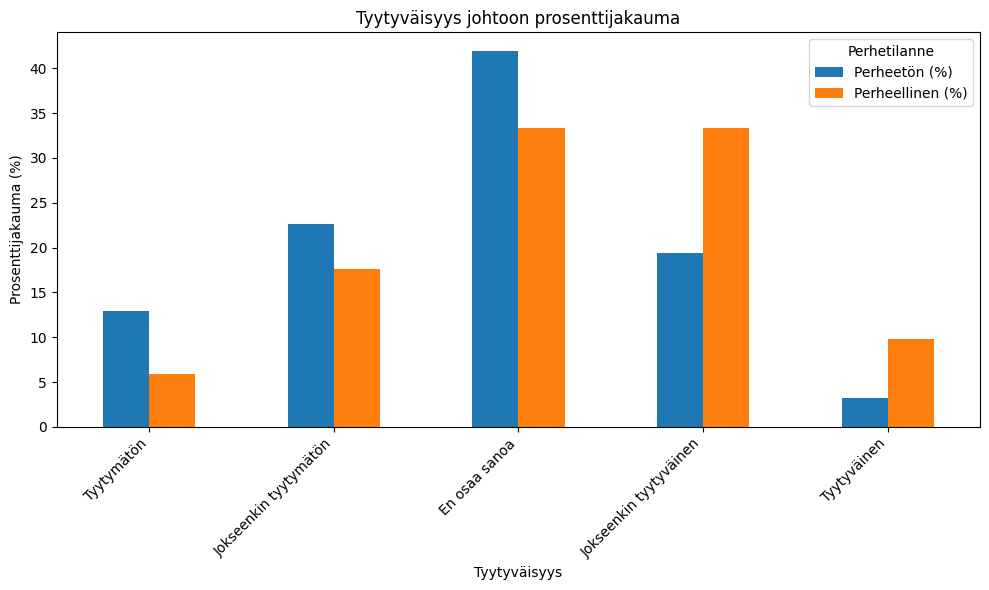

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Data from the table
data = {
    "Tyytyväisyys": ["Tyytymätön", "Jokseenkin tyytymätön", "En osaa sanoa", "Jokseenkin tyytyväinen", "Tyytyväinen"],
    "Perheetön (%)": [12.9, 22.6, 41.9, 19.4, 3.2],
    "Perheellinen (%)": [5.9, 17.6, 33.3, 33.3, 9.8]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
df.plot(x="Tyytyväisyys", kind="bar", figsize=(10, 6))

# Adding labels and title
plt.title('Tyytyväisyys johtoon prosenttijakauma')
plt.xlabel('Tyytyväisyys')
plt.ylabel('Prosenttijakauma (%)')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Perhetilanne')

# Show the plot
plt.tight_layout()
plt.show()


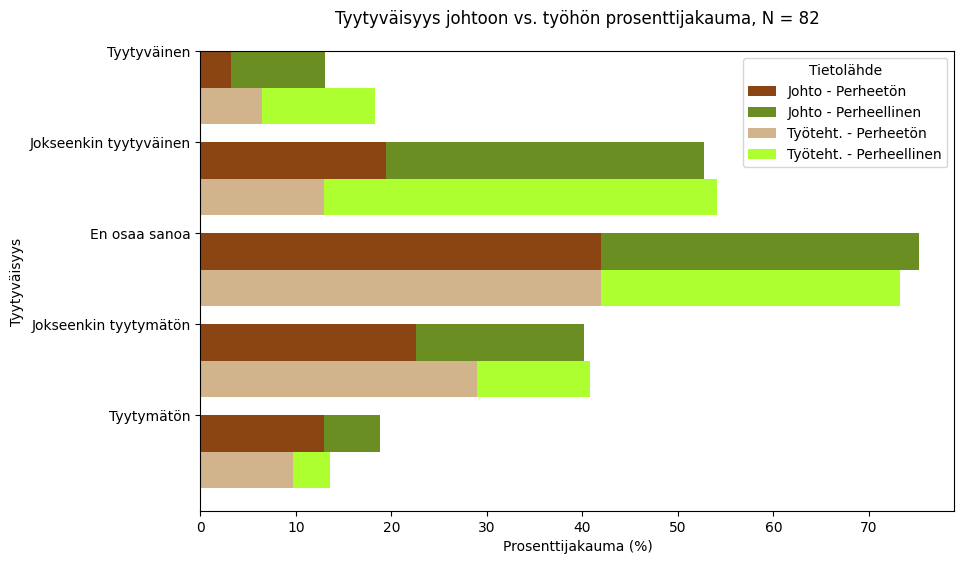

In [50]:
tyytyvaisyys_johto_perhe = {
    "Tyytyväisyys": ["Tyytymätön", "Jokseenkin tyytymätön", "En osaa sanoa", "Jokseenkin tyytyväinen", "Tyytyväinen"],
    "Perheetön (%)": [12.9, 22.6, 41.9, 19.4, 3.2],
    "Perheellinen (%)": [5.9, 17.6, 33.3, 33.3, 9.8]
}

tyytyvaisyys_tyo_perhe = {
    "Tyytyväisyys": ["Tyytymätön", "Jokseenkin tyytymätön", "En osaa sanoa", "Jokseenkin tyytyväinen", "Tyytyväinen"],
    "Perheetön (%)": [9.7, 29 , 41.9 , 12.9 , 6.5],
    "Perheellinen (%)": [3.9, 11.8, 31.4, 41.2, 11.8]
}


df_johto = pd.DataFrame(tyytyvaisyys_johto_perhe)
df_tyo = pd.DataFrame(tyytyvaisyys_tyo_perhe)

df_johto.set_index("Tyytyväisyys", inplace=True)
df_tyo.set_index("Tyytyväisyys", inplace=True)


ax = df_johto.plot.barh(stacked=True, figsize=(10, 6), color=['#8B4513','#6B8E23'], position=1, width=0.4, label='Johto')
df_tyo.plot.barh(stacked=True, ax=ax, color=['#D2B48C', '#ADFF2F'], position=2, width=0.4, label='Tyo')


plt.title('Tyytyväisyys johtoon vs. työhön prosenttijakauma, N = 82', pad=20)
plt.xlabel('Prosenttijakauma (%)')
plt.ylabel('Tyytyväisyys')
plt.legend(title='Perhetilanne')


handles, labels = ax.get_legend_handles_labels()

labels[0] = 'Johto - Perheetön'
labels[1] = 'Johto - Perheellinen'
labels[2] = 'Työteht. - Perheetön'
labels[3] = 'Työteht. - Perheellinen'
ax.legend(handles, labels, title='Tietolähde', loc='upper right')

# Show the plot
plt.tight_layout(pad=2)
plt.show()